In [7]:
#importing the needed libraries
import pickle
import math
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import winter

%matplotlib inline
#gets pickle files from directories
pickleContents = open ( r"C:\Users\17573\Documents\School\SURP-2024\week-2\eostable.pk", "rb" )

pickle = pickle.load(pickleContents)

#retrive the local values from the pickle binary, and stores them in the correspoing list
p_local = pickle["DS_CMF1_wcrust/"]['ps']
rho_local = pickle["DS_CMF1_wcrust/"]['rhos']

In [8]:
#ps_to_rhos routine
def ps_to_rho(p_target):
    
    #rho_local = x
    for x in range(len(rho_local)-1):
    #first case: when the p_targer is less that the first value of the p_local
        if p_target < p_local[0]:
                p_target = p_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if p_target >= p_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                p_target = p_local[-1]
                x = len(p_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if p_local[x] < p_target and p_local[x+1] > p_target:
                #local = x
                break
   # print("rho_Local:",rho_local[x],)
    rho_target = rho_local[x] + (((rho_local[x+1] - rho_local[x]) / (p_local[x+1] - p_local[x])) * (p_target - p_local[x]))
    return rho_target
##

In [9]:
##
#rhos to ps subroutine
def rho_to_ps(rho_target):
    for x in range(len(rho_local)-1):
        
        #p_local = x
    #first case: when the p_targer is less that the first value of the p_local
        if rho_target < rho_local[0]:
                rho_target = rho_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if rho_target >= rho_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                rho_target = rho_local[-1]
                x = len(rho_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if rho_local[x] < rho_target and rho_local[x+1] > rho_target:
                #local = x
                break
    #Equation used:  
    #print("p_Local: ",p_local[x])
    p_target = p_local[x] + (((p_local[x+1] - p_local[x]) / (rho_local[x+1] - rho_local[x])) * (rho_target - rho_local[x]))
    
    return p_target
##

In [13]:
def euler(rho_c, dr):
    
    pass

    #get the values from the end user to the function
    r = dr
    rho = rho_c
    #Declaring variables
    #
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi
    
    p = rho_to_ps(rho)
    
    #forgot to initiate before using
    #i replace every other instance of m with mr 
    mr = 4.0 /3.0 * pi * r**3 * rho
    #
   

#pulled the exponent value from google for these ones as the physics book gave me metric values
#if these are wrong the exponent would be the issue, the other numbers should be okay(hopefully)
#
 ###
    rs = [r]
    rhos = [rho]
    ps = [p]
    ms = [mr]
   ### 
    for i in range(10000):
    
        # calculate the derivative
        #most the issues here where from wrong syntax and forgetting physics constants 
        
        
        #debuging to see whats variable is storing
        
        print("for loop iteration: ", i)
        print("r",r)
        print("p",p)
        print("mr",mr)
        print("rho",rho)
        print("------------")
        #should be commented out once debugging is complete
        
        #Tolman-Oppenheimer-Volkoff Equation
        #re wrote the equation thinking that was the issue, it turs out not putting in parantetheses each part of the fraction
        #that caused mr in the first case multiplyhing stuff by 0 leading to all values being null exept for r
        
        #dPdr = ((G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+(4*pi*r**3*p)/(mr*c**2))*((1-((2*G*mr)/(c**2*r))**-1))
        dPdr = (-(G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+((4*pi*r**3*p)/(mr*c**2)))*((1-((2*G*mr)/(c**2*r)))**-1)   
        #Mass conversion equation
        dmdr = 4*pi*r**2*rho
        
        #final notes at 6/14/2024 at 3:12, the issue with the euler method running seems to be at mr*c**2 making a division by zero
        #while i belive that the change could be fixed in less than 20 minutes, i have worked on finishing this up since 7 and thus will wait till the progress report for this
        
        # use the derivative 
        m_new = mr + dmdr * dr
        p_new = p + dPdr * dr
        #call subroutine to find rho from p_new
        rho_new = ps_to_rho(p_new)
        r_new = r + dr
        
        # append the new data
        rs.append(r_new)
        ps.append(p_new)
        ms.append(m_new)
        rhos.append(rho_new)
        
        # replace old by your new values
        r = r_new
        rho = rho_new
        p = p_new
        mr = m_new
        
        #print(r, rho, p, mr)
        
        if rho < 1e-4 * rho_c:
            #following 2 lines should be commented after debugging is done
            print("break condition met!")
            print(rho , " < ", 1**-4*rho_c)
            break
        # setup criteria to end the calculation
        # this is to prevent the graph to be 90% a flat graph isnce thwe change of desity will be neglible
  
    rs = np.array(rs)
    rhos = np.array(rhos)
    ps = np.array(ps)
    ms = np.array(ms)

    return rs, rhos, ps, ms



    
rs, rhos, ps, ms = euler(1e15,1000)

#

for loop iteration:  0
r 1000
p 2.2867672859170018e+35
mr 4.1887902047863903e+24
rho 1000000000000000.0
------------
for loop iteration:  1
r 2000
p 2.2867611018730888e+35
mr 1.6755160819145563e+25
rho 999998708501238.2
------------
for loop iteration:  2
r 3000
p 2.286752240870819e+35
mr 6.70205783587739e+25
rho 999996857936523.6
------------
for loop iteration:  3
r 4000
p 2.2867379752241195e+35
mr 1.801175585289992e+26
rho 999993878645737.9
------------
for loop iteration:  4
r 5000
p 2.286717842255844e+35
mr 3.811782575874448e+26
rho 999989674001662.9
------------
for loop iteration:  5
r 6000
p 2.2866916920362383e+35
mr 6.953342789383723e+26
rho 999984212692410.1
------------
for loop iteration:  6
r 7000
p 2.286659459424882e+35
mr 1.147716479045608e+27
rho 999977481113812.0
------------
for loop iteration:  7
r 8000
p 2.2866211108686564e+35
mr 1.763454773096394e+27
rho 999969472258509.9
------------
for loop iteration:  8
r 9000
p 2.2865766270604207e+35
mr 2.5676779405489117e+27


for loop iteration:  214
r 215000
p 2.1486698638761348e+35
mr 4.062142091530851e+31
rho 970893001744929.4
------------
for loop iteration:  215
r 216000
p 2.1474030231145734e+35
mr 4.118539370979151e+31
rho 970623906999132.8
------------
for loop iteration:  216
r 217000
p 2.1461307991548617e+35
mr 4.175446719409799e+31
rho 970353668786547.0
------------
for loop iteration:  217
r 218000
p 2.144853199201069e+35
mr 4.232866216438059e+31
rho 970082288637417.8
------------
for loop iteration:  218
r 219000
p 2.1435702304849926e+35
mr 4.290799937866473e+31
rho 969806337770828.6
------------
for loop iteration:  219
r 220000
p 2.142281903923557e+35
mr 4.3492497489275975e+31
rho 969527927270774.2
------------
for loop iteration:  220
r 221000
p 2.14098822828727e+35
mr 4.408217633642069e+31
rho 969248360822648.4
------------
for loop iteration:  221
r 222000
p 2.139689211005789e+35
mr 4.467705649874912e+31
rho 968967640032017.9
------------
for loop iteration:  222
r 223000
p 2.13838485953612

for loop iteration:  459
r 460000
p 1.699324301244871e+35
mr 3.7434529879623616e+32
rho 869482247587238.6
------------
for loop iteration:  460
r 461000
p 1.6970242021759957e+35
mr 3.766572903689167e+32
rho 868929078898225.8
------------
for loop iteration:  461
r 462000
p 1.6947212998968455e+35
mr 3.7897786770304204e+32
rho 868375236043402.5
------------
for loop iteration:  462
r 463000
p 1.6924156067061507e+35
mr 3.813070380106841e+32
rho 867820721980585.9
------------
for loop iteration:  463
r 464000
p 1.6901071349040628e+35
mr 3.8364480844666534e+32
rho 867265539667935.1
------------
for loop iteration:  464
r 465000
p 1.68779589679205e+35
mr 3.859911861085962e+32
rho 866709692063925.6
------------
for loop iteration:  465
r 466000
p 1.6854819046727922e+35
mr 3.8834617803691245e+32
rho 866153182127324.5
------------
for loop iteration:  466
r 467000
p 1.683165170850076e+35
mr 3.90709791214914e+32
rho 865596012817165.0
------------
for loop iteration:  467
r 468000
p 1.68084570762

for loop iteration:  757
r 758000
p 9.460132997387374e+34
mr 1.4511949628236823e+33
rho 675002161224369.1
------------
for loop iteration:  758
r 759000
p 9.43445771721355e+34
mr 1.4560686027399467e+33
rho 674258333250354.8
------------
for loop iteration:  759
r 760000
p 9.408792590422167e+34
mr 1.460949725592071e+33
rho 673514799425804.0
------------
for loop iteration:  760
r 761000
p 9.383137712996448e+34
mr 1.4658383220828972e+33
rho 672771562531407.2
------------
for loop iteration:  761
r 762000
p 9.357493180590232e+34
mr 1.470734382896287e+33
rho 672028625338312.5
------------
for loop iteration:  762
r 763000
p 9.331859088527907e+34
mr 1.475637898697309e+33
rho 671285990608123.5
------------
for loop iteration:  763
r 764000
p 9.30623553180435e+34
mr 1.480548860132427e+33
rho 670543661092897.5
------------
for loop iteration:  764
r 765000
p 9.280622605084868e+34
mr 1.485467257829686e+33
rho 669801639535144.4
------------
for loop iteration:  765
r 766000
p 9.25502040270515e+3

for loop iteration:  1080
r 1081000
p 2.3706661982819732e+34
mr 3.276646724161818e+33
rho 397987439034279.44
------------
for loop iteration:  1081
r 1082000
p 2.354375506197711e+34
mr 3.282490998812801e+33
rho 396981759582057.06
------------
for loop iteration:  1082
r 1083000
p 2.3381308960764244e+34
mr 3.2883312958777385e+33
rho 395978924925073.8
------------
for loop iteration:  1083
r 1084000
p 2.3219322999202685e+34
mr 3.2941676125670454e+33
rho 394978930865593.0
------------
for loop iteration:  1084
r 1085000
p 2.305779649186574e+34
mr 3.2999999461857283e+33
rho 393981773172244.06
------------
for loop iteration:  1085
r 1086000
p 2.289672874794585e+34
mr 3.305828294132859e+33
rho 392987447580438.6
------------
for loop iteration:  1086
r 1087000
p 2.2736119071321583e+34
mr 3.31165265390105e+33
rho 391995949792783.9
------------
for loop iteration:  1087
r 1088000
p 2.257596676062432e+34
mr 3.3174730230759273e+33
rho 391007275479494.5
------------
for loop iteration:  1088
r 10

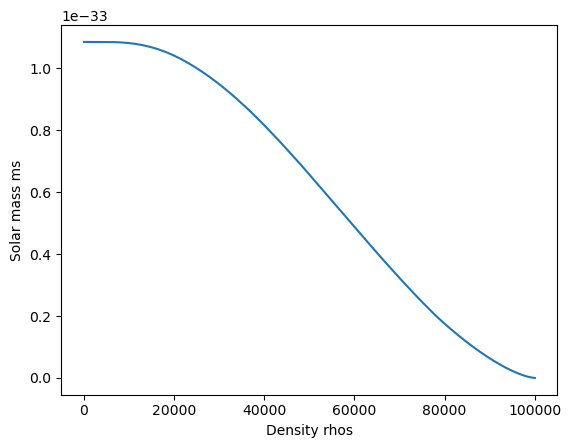

In [12]:
    
# x-axis values 
    
rhos = rhos / 1e5
ms = ms / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rhos
ax.set_xlabel('Density rhos')
# Y-axis values 
y = ms
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()

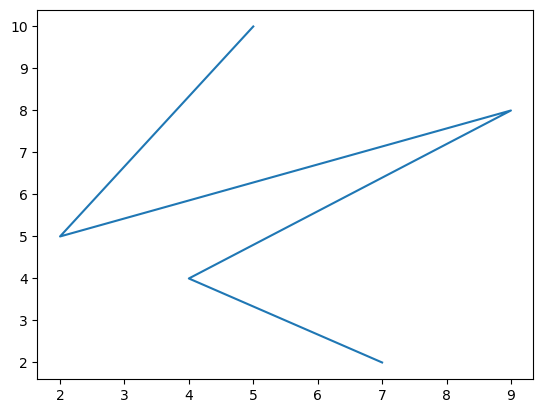

In [19]:
#Plot Testing

#i dont know if ill have to use more lines for the model for taks 3


# x-axis values 
x = [5, 2, 9, 4, 7] 
 
# Y-axis values 
y = [10, 5, 8, 4, 2] 
 
# Function to plot 
plt.plot(x, y)
 
# function to show the plot 
plt.show()